In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator #
from tensorflow.keras.models import Sequential #
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
#from keras.preprocessing.image import ImageDataGenerator
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
#from keras.layers import Conv2D, MaxPooling2D
# import os

num_classes = 5
img_rows, img_cols = 128, 512
batch_size = 8

train_data_dir = 'E:\\AIBroadway\\FunctionalGroup\\Train'
validation_data_dir = 'E:\\AIBroadway\\FunctionalGroup\\Test'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 369 images belonging to 5 classes.
Found 204 images belonging to 5 classes.


In [14]:
#convolution
model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(256, (3, 3), padding='same',
                 input_shape= (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(128, (3, 3), padding='same'))
#model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#model.add(Dense(units = 1024, activation = 'relu'))
#model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 512, 256)     7168      
_________________________________________________________________
activation_21 (Activation)   (None, 128, 512, 256)     0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 256, 256)      0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 64, 256, 256)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 62, 254, 128)      295040    
_________________________________________________________________
activation_22 (Activation)   (None, 62, 254, 128)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 127, 128)     

In [16]:
# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                      
checkpoint = ModelCheckpoint("E:\\AIBroadway\\FunctionalGroup\\functionalgroup.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
                                    
    
earlystop = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.001,  #Abs value and is the main change required before we stop
                          patience = 3, #no of epocs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keep the best weigts once stopped

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

nb_train_samples = 369
nb_validation_samples = 204
epochs = 7

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/7
46/46 [==============================] - 396s 9s/step - loss: 1.7063 - accuracy: 0.2382 - val_loss: 1.6075 - val_accuracy: 0.2000

Epoch 00001: val_loss improved from inf to 1.60752, saving model to E:\AIBroadway\FunctionalGroup\functionalgroup.h5
Epoch 2/7
46/46 [==============================] - 339s 7s/step - loss: 1.6359 - accuracy: 0.2659 - val_loss: 1.6097 - val_accuracy: 0.2200

Epoch 00002: val_loss did not improve from 1.60752
Epoch 3/7
46/46 [==============================] - 344s 8s/step - loss: 1.5869 - accuracy: 0.2327 - val_loss: 1.6091 - val_accuracy: 0.2000

Epoch 00003: val_loss did not improve from 1.60752
Epoch 4/7
46/46 [==============================] - 342s 7s/step - loss: 1.5731 - accuracy: 0.2493 - val_loss: 1.6124 - val_accuracy: 0.2000
Restoring model weights from the end of the best epoch.

Epoch 00004: val_loss did not improve from 1.60752

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 00004: early stopping


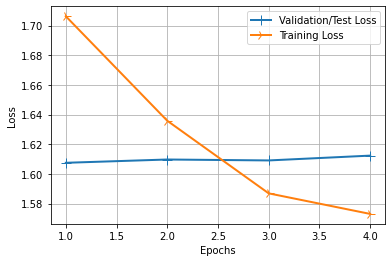

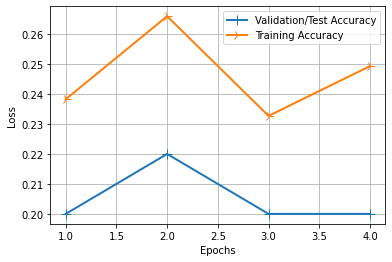

In [17]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting our acuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1) # put classifier not model
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')

target_names = {0:'Alcohol',1:'Aldehyde',2:'Amine',3:'Carboxylic',4:'Ether'}

print(classification_report(validation_generator.classes, y_pred, target_names=target_names.values()))



D:\Other\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 0 40  0  0  0]
 [ 0 40  0  0  0]
 [ 0 44  0  0  0]
 [ 0 40  0  0  0]
 [ 0 40  0  0  0]]
Classification Report
              precision    recall  f1-score   support

     Alcohol       0.00      0.00      0.00        40
    Aldehyde       0.20      1.00      0.33        40
       Amine       0.00      0.00      0.00        44
  Carboxylic       0.00      0.00      0.00        40
       Ether       0.00      0.00      0.00        40

    accuracy                           0.20       204
   macro avg       0.04      0.20      0.07       204
weighted avg       0.04      0.20      0.06       204



D:\Other\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Other\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Other\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


D:\Other\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


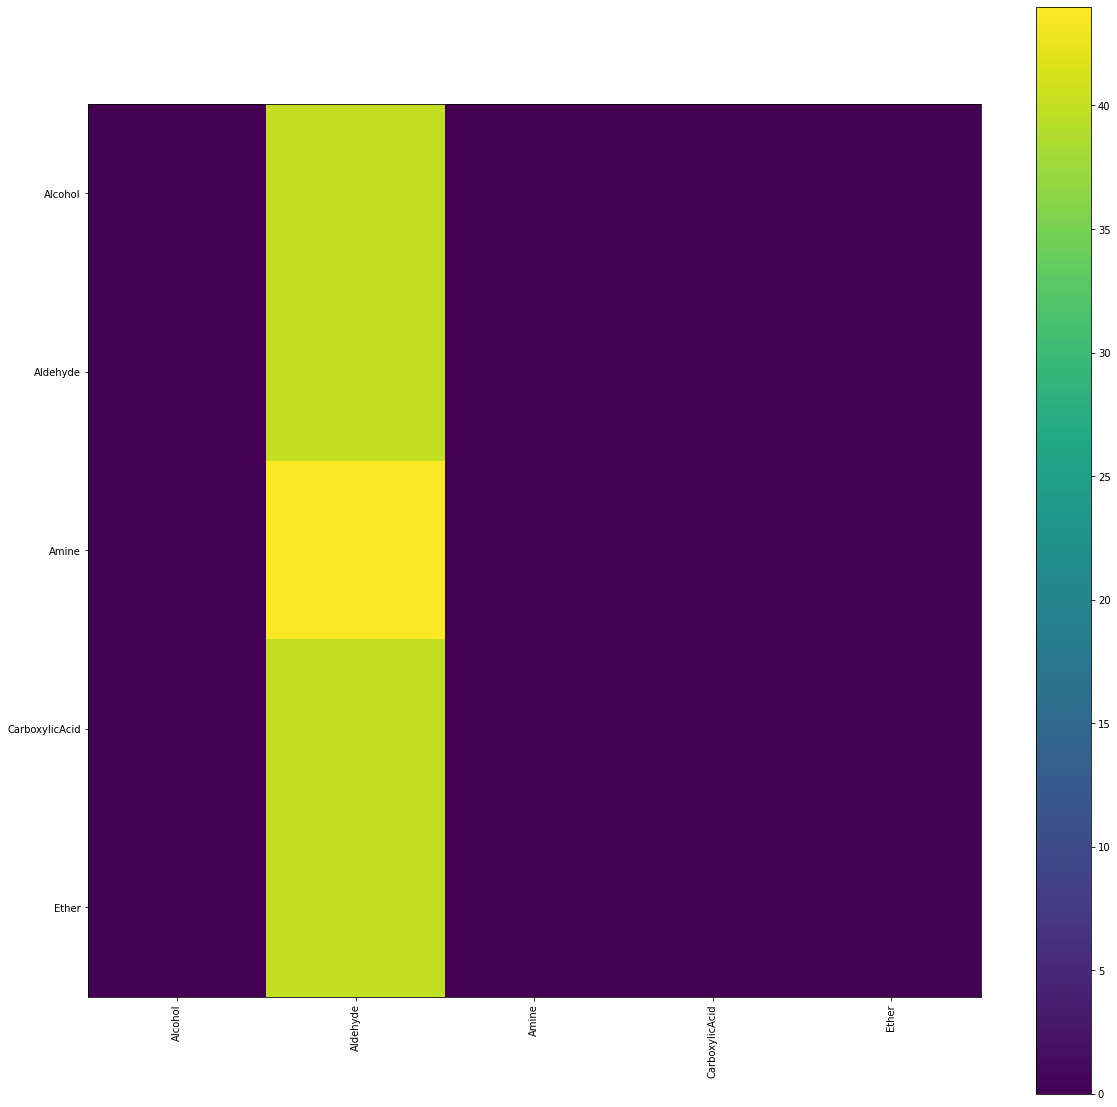

In [19]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.models import load_model

img_row, img_height, img_depth = 100,100,3
model = load_model('functionalgroup.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 1098
nb_validation_samples = 272

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [37]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
target_names = {0:'Alcohol',1:'Aldehyde',2:'Amine',3:'Carboxylic',4:'Ether'}

model = load_model('functionalgroup.h5')
test_image = image.load_img('E:\\AIBroadway\\FunctionalGroup\\Train\\Amine\\1 (2).jpg',target_size = (128,512,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
print(result)
classes = target_names[np.argmax(result)]
classes

[[0.08478022 0.24741255 0.6164264  0.02671535 0.02466545]]


'Amine'